# Individual Analysis for the Franck-Hertz Experiment

Use this template to carry out the analysis tasks for the experiment.  You may need to consult the documentation for different Python packages.  Also recommended: the [Whirlwind Tour of Python](https://jakevdp.github.io/WhirlwindTourOfPython/) and the [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/) both by Jake VanderPlas.

We will also be using [**LMFit**](https://lmfit.github.io/lmfit-py/) for curve fitting 
and the [Uncertainties](https://pythonhosted.org/uncertainties/) package for calculating statistical uncertainty. 

In [33]:
# Run this cell with Shift-Enter, and wait until the asterisk changes to a number, i.e., [*] becomes [1]
import numpy as np
import scipy.constants as const
import uncertainties as unc
import uncertainties.unumpy as up
import matplotlib.pyplot as plt
import pandas as pd

from lmfit.models import LinearModel
from lmfit.models import QuadraticModel

## Summary of tasks

### Prior to working on this notebook

1. Watch the videos on the experiment and work out at least exercises 2 and 3 on the mean free path of electrons in the mercury F-H tube given in the experiment instructions.  These will be relevant to the "RSB" method of analyzing Franck-Hertz data.


2. Read through the paper by Rapior, Sengstock and Baev (RSB) linked on the experiment page: Rapior, G., K. Sengstock, and V Baev, <a href="http://courses.washington.edu/phys432/restricted/AJP_rapior_sengstock_baev.pdf" target="_blank">"New features of the Franck-Hertz experiment,"</a> <i>Am. J. Phys.,</i> <strong>74</strong>, p. 423-428 (2006).  Also study the lecture notes on this paper.


3. Download the PDFs of the chart-recorder scans for the two Franck-Hertz data runs (one for Hg, the other for Ne).


4. Extract from the scans the positions in paper-grid units of (1) calibration marks, (2) positions of anode current minima ("troughs") and maxima ("peaks"), and, for neon (3) positions of the small features (tiny peaks and troughs) seen in the neon-scan lock-in amp output.  The separations of similar features will be used to estimate the 3s-3p state separation.  **You do not need to estimate the uncertainty in these measurements**, but make your estimates of position to within 1/10 of small square.


5. Assign numbers to each anode current feature, for example, 1, 2, 3,... for peak 1, peak 2, peak 3... and similarly for the troughs.  (Not necessary for the Ne lock-in scan; these will be analyzed differently.)


6. Create spreadsheets with these data to be read into the notebook for further processing.

### Tasks for this notebook

For the neon data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.


* From the measurements taken from the lock-in scan for neon, take differences between adjacent features that indicate transitions between the 3s and 3p states.  Look at the list of differences to see if they have about the same value, and check any outliers against the original XY plot.  Then calculate an average and uncertainty to compare to the expected 1.7 V average separation between these states.

For the mercury data set:

* Plot and fit the calibration data.  Create a calibration function to turn feature positions into voltages.


* Apply the calibration to all of the position measurements.


* For the anode current peaks and troughs, analyze each set in three different ways:
  1. Fit a line through the peak/trough position vs. number.  From this obtain the average energy difference.
  2. Fit a quadratic through the peak/trough positions vs. number.  From this obtain the fit parameters to use in the RSB formalism.
  3. Take first differences of the peak/trough positions, and plot/fit these to a line.  The fit line should extrapolate to the energy of the first excited state, acccording to the RSB formalism.  Test this idea with a calculation from the fit.

* Use the fit coefficients associated with the RSB method to estimate the mean free path of the electrons between collisions with Hg atoms.  You will also need a dimension from the picture of the Hg tube.  Compare this result to the one calculated from the exercises and to the results cited by RSB in their paper.


## Read in the Franck-Hertz Data

You will probably want 4 to 5 different DataFrames: Neon calibration, neon peak/trough positions, neon small-feature positions, Mercury calibration, and mercury peak/trough positions.

One way to do it is create a different CSV file for each DataFrame.  Another way is to put each spreadsheet on a different Excel sheet within a single Excel file.  You can read the whole file into a Pandas "OrderedDict"
with the command 

    `FHdata = pd.read_excel('Franck-Hertz_data.xlsx', sheet_name = None)`

Then each sheet will be in its own DataFrame that you would reference with `FHdata['sheet-name']`.

In [75]:
# Example
FHdata = pd.read_excel('data.xlsx',sheet_name=None)      
# The keys are the sheet names
FHdata.keys()

dict_keys(['Neon Lock-In Calibration', 'Neon PDA Calibration', 'Neon Lock-In Min and Max', 'Neon Lock-In Small Features', 'Neon PDA Min and Max', 'Mercury Lock-In Calibration', 'Mercury PDA Calibration', 'Mercury Lock-In Min and Max', 'Mercury PDA Min and Max'])

## Neon Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

In [76]:
# Look at the calibration data first
nc_data = FHdata['Neon PDA Calibration']
nc_data

,grid x,grid y,voltage (V),current (nA),min or max,number
0,3.25,10.5,2,0,NaN,NaN
1,25.25,10.5,20,0,NaN,NaN
2,49.50,10.5,40,0,NaN,NaN
3,74.00,10.5,60,0,NaN,NaN
4,86.00,10.5,70,0,NaN,NaN


### Fit a line

You know how to do this.  Save the fit results to use in the calibration function

In [77]:
##  Hint: make a function to do the fitting and plotting of the fit
##  Have it return the fit parameters as a Parameters object, like this
##

def model_fit_and_plot(xdata, ydata, model=LinearModel()):
    
    pars = model.guess(ydata, x=xdata)
    model_fit = model.fit(ydata, pars, x=xdata)
    
    return model_fit.params


### Write a calibration function

Pass your fit constants to the calibration function.  Test it.

In [78]:
params = model_fit_and_plot(nc_data['grid x'], nc_data['voltage (V)'])
params

name,value,standard error,relative error,initial value,min,max,vary
slope,0.82133758,0.00102836,(0.13%),0.8213375847637926,-inf,inf,True
intercept,-0.69566903,0.05811869,(8.35%),-0.6956690347565279,-inf,inf,True


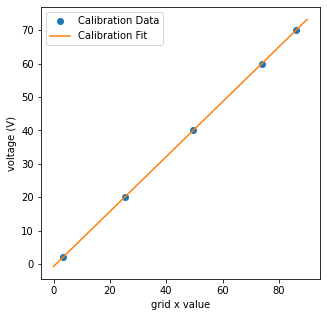

In [79]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)

fit_x = np.linspace(0, 90, 100)
fit_y = fit_x*params['slope'].value + params['intercept'].value

ax.plot(nc_data['grid x'], nc_data['voltage (V)'], marker='o', linestyle='none', label="Calibration Data")
ax.plot(fit_x, fit_y, linestyle='-', label="Calibration Fit")

ax.set_xlabel("grid x value")
ax.set_ylabel("voltage (V)")

ax.legend();

### Apply the calibration

You might want to add columns of the calibrated data to the existing DataFrame, or make new DataFrames or arrays.  It is up to you.

In [80]:
npda_data = FHdata['Neon PDA Min and Max']
npda_data['voltage (V)'] = npda_data['grid x']*params['slope'].value + params['intercept'].value
npda_data

,grid x,grid y,voltage (V),current (nA),min or max,number
0,17.5,20.50,13.677739,NaN,max,1
1,26.5,9.25,21.069777,NaN,min,1
2,38.5,28.00,30.925828,NaN,max,2
3,48.0,8.50,38.728535,NaN,min,2
4,60.5,35.00,48.995255,NaN,max,3
5,71.0,15.50,57.619299,NaN,min,3
6,84.5,42.50,68.707357,NaN,max,4


In [81]:
t_numbers = npda_data[npda_data['min or max'] == 'min']['number']
t_voltages = npda_data[npda_data['min or max'] == 'min']['voltage (V)']

p_numbers = npda_data[npda_data['min or max'] == 'max']['number']
p_voltages = npda_data[npda_data['min or max'] == 'max']['voltage (V)']

Make a plot, just to check that it looks OK.

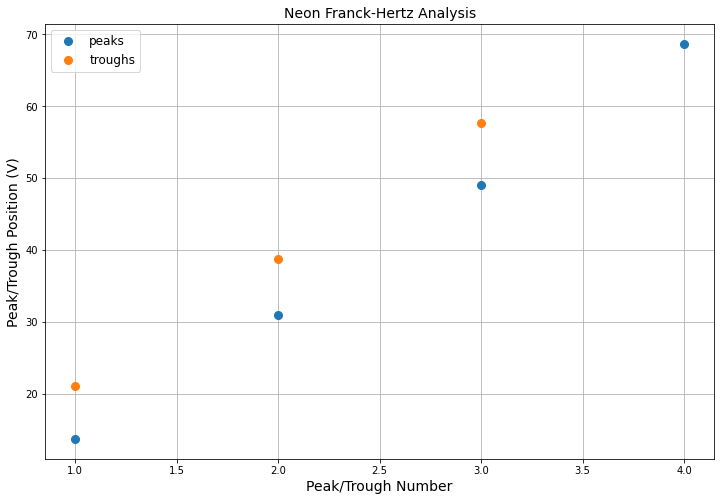

In [82]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

ax.plot(p_numbers, p_voltages, marker='o', linestyle='none', markersize=8, label='peaks')
ax.plot(t_numbers, t_voltages, marker='o', linestyle='none', markersize=8, label='troughs')

plt.legend(fontsize=12);

### Fit the peak/trough positions 

Fit the peak and trough positions versus number in two different ways: with a line, to find the average spacing, and with a quadratic, to find the coefficients to apply to the model of RSB.  Save the fit results.  Recommended: just same the `params` object as a whole.

To fit to a quadratic, you may us the `QuadraticModel` in exactly the same way as the `LinearModel`.  Look up **QuadraticModel** in the LMFit documenation for details.

#### Neon troughs first

In [83]:
# Troughs line fit

model = LinearModel()
pars = model.guess(t_voltages, x=t_numbers)
neon_t_lin_fit = model.fit(t_voltages, pars, x=t_numbers)
neon_t_lin_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,18.2747613,0.35564958,(1.95%),18.274761260994378,-inf,inf,True
intercept,2.58968130,0.76829091,(29.67%),2.589681304298665,-inf,inf,True


In [84]:
# Now with a quadratic

model = QuadraticModel()
pars = model.guess(t_voltages, x=t_numbers)
neon_t_quad_fit = model.fit(t_voltages, pars, x=t_numbers)
neon_t_quad_fit.params

name,value,standard error,relative error,initial value,min,max,vary
a,0.61600319,1.9459e-14,(0.00%),0.6160031885728178,-inf,inf,True
b,15.8107485,7.8643e-14,(0.00%),15.810748506703087,-inf,inf,True
c,4.64302527,6.9255e-14,(0.00%),4.643025266208041,-inf,inf,True


#### Now neon peaks

In [85]:
# Peaks line fit

model = LinearModel()
pars = model.guess(p_voltages, x=p_numbers)
neon_p_lin_fit = model.fit(p_voltages, pars, x=p_numbers)
neon_p_lin_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,18.3158281,0.39389964,(2.15%),18.31582814023257,-inf,inf,True
intercept,-5.21302575,1.07873861,(20.69%),-5.2130257509573905,-inf,inf,True


In [86]:
# Peaks quadratic

model = QuadraticModel()
pars = model.guess(p_voltages, x=p_numbers)
neon_p_quad_fit = model.fit(p_voltages, pars, x=p_numbers)
neon_p_quad_fit.params

name,value,standard error,relative error,initial value,min,max,vary
a,0.61600319,0.09182841,(14.91%),0.616003188572836,-inf,inf,True
b,15.2358122,0.46643041,(3.06%),15.2358121973684,-inf,inf,True
c,-2.13300981,0.51127879,(23.97%),-2.133009808093199,-inf,inf,True


### Plot the fitlines over the data

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

Use the `model.eval()` function with the saved parameters to build fit lines. 

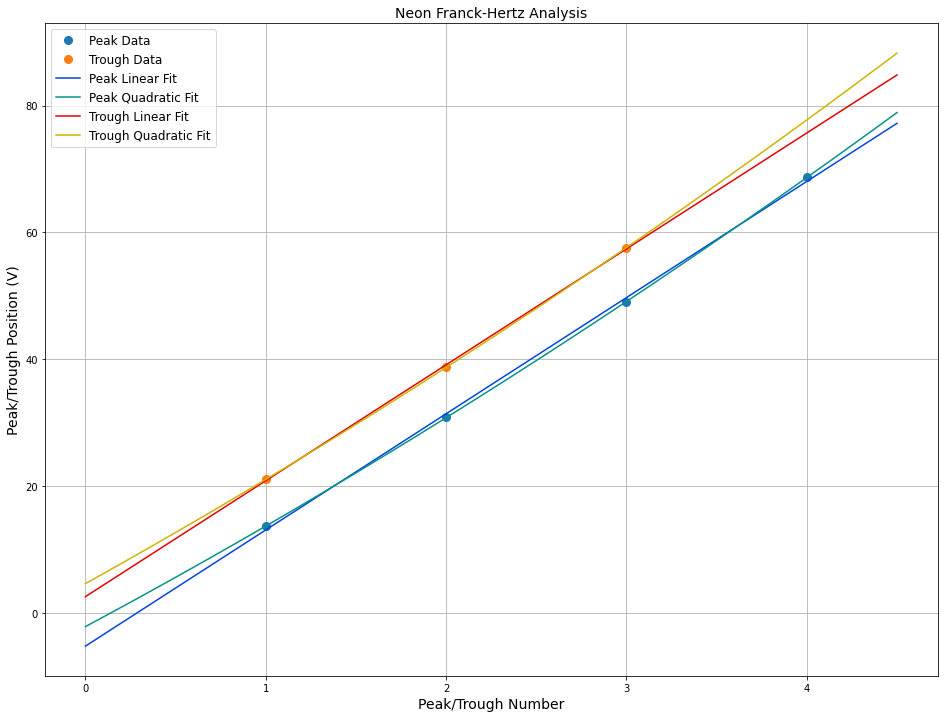

In [88]:
# For a smooth curve make an x range with a bunch of points.  100 should be fine.
xfit = np.linspace(0, 4.5, 100)

trough_line = neon_t_lin_fit.eval(neon_t_lin_fit.params, x=xfit)
peak_line = neon_p_lin_fit.eval(neon_p_lin_fit.params, x=xfit)

trough_quad = neon_t_quad_fit.eval(neon_t_quad_fit.params, x=xfit)
peak_quad = neon_p_quad_fit.eval(neon_p_quad_fit.params, x=xfit)


# Then redo the above plot with fit lines and curves

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 12)
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

ax.plot(p_numbers, p_voltages, marker='o', linestyle='none', markersize=8, label='Peak Data')
ax.plot(t_numbers, t_voltages, marker='o', linestyle='none', markersize=8, label='Trough Data')

ax.plot(xfit, peak_line, label="Peak Linear Fit", color="xkcd:blue")
ax.plot(xfit, peak_quad, label="Peak Quadratic Fit", color='xkcd:teal')
ax.plot(xfit, trough_line, label="Trough Linear Fit", color="xkcd:red")
ax.plot(xfit, trough_quad, label="Trough Quadratic Fit", color="xkcd:mustard")

plt.legend(fontsize=12);

### Take differences in peak/trough positions

Next, apply the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [89]:
# Recommended: use Python "List comprehensions"  See the Python text on how to make these
npda_data['dV'] = npda_data['voltage (V)'] - npda_data['voltage (V)'].shift(1)

# Have a look at them, e.g., 
# print('List of Neon peak differences (V):', Hg_peak_diffs)
print('List of neon peak differences (V): ', npda_data[npda_data['min or max'] == 'max']['dV'].tolist())
# print('List of Neon trough differences (V):', Hg_trough_diffs)
print('List of neon trough differences (V): ', npda_data[npda_data['min or max'] == 'min']['dV'].tolist())

List of neon peak differences (V):  [nan, 9.856051017165509, 10.26671980954741, 11.088057394311193]
List of neon trough differences (V):  [7.392038262874134, 7.802707055256029, 8.624044640019818]


In [110]:
# Fit of line to trough diffs

t_diffs = npda_data[npda_data['min or max'] == 'min']['dV']

model = LinearModel()
pars = model.guess(t_diffs, x=t_numbers)
t_diff_fit = model.fit(t_diffs, pars, x=t_numbers)
t_diff_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,0.61600319,0.11854987,(19.25%),0.6160031885728404,-inf,inf,True
intercept,6.70759028,0.25609699,(3.82%),6.70759027557098,-inf,inf,True


In [111]:
# Next, peak diffs

p_diffs = npda_data[npda_data['min or max'] == 'max']['dV'][1:]

model = LinearModel()
pars = model.guess(p_diffs, x=p_numbers[1:])
p_diff_fit = model.fit(p_diffs, pars, x=p_numbers[1:])
p_diff_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,0.61600319,0.11854986,(19.25%),0.6160031885728428,-inf,inf,True
intercept,8.55559984,0.36858650,(4.31%),8.555599841289508,-inf,inf,True


### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

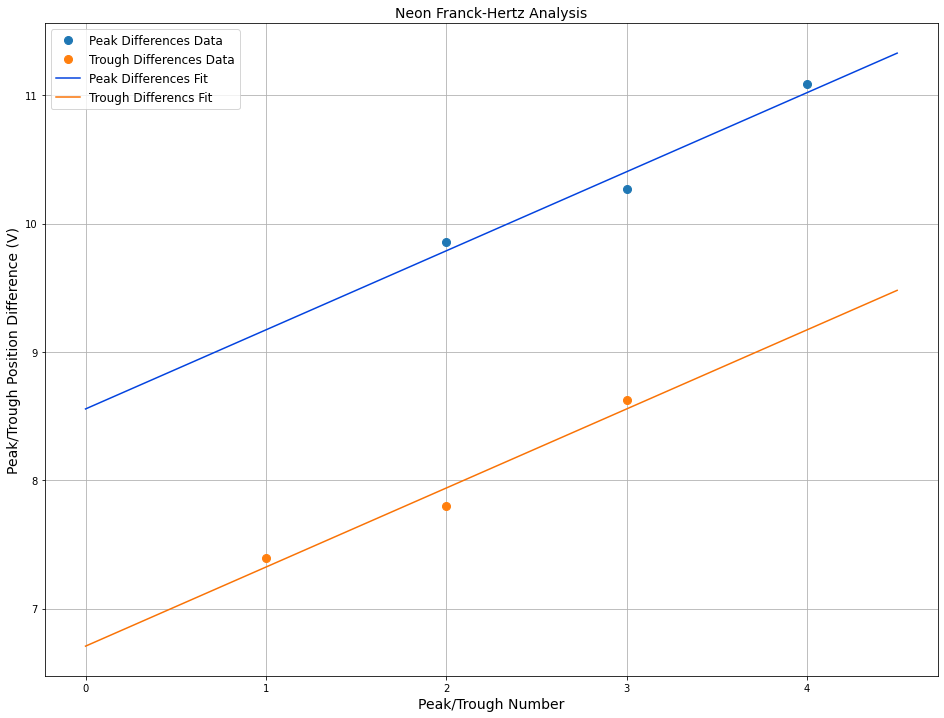

In [109]:
# Plot here

xfit = np.linspace(0, 4.5, 100)

t_diff_line = t_diff_fit.eval(t_diff_fit.params, x=xfit)
p_diff_line = p_diff_fit.eval(p_diff_fit.params, x=xfit)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 12)
plt.grid()
plt.title('Neon Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position Difference (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

ax.plot(p_numbers[1:], p_diffs, marker='o', linestyle='none', markersize=8, label='Peak Differences Data')
ax.plot(t_numbers, t_diffs, marker='o', linestyle='none', markersize=8, label='Trough Differences Data')

ax.plot(xfit, p_diff_line, color="xkcd:blue", label="Peak Differences Fit")
ax.plot(xfit, t_diff_line, color="xkcd:orange", label="Trough Differencs Fit")

plt.legend(fontsize=12);

## Final results for neon excited state

Compare fit coefficients from the quadratic to similar from the RSB difference method.  Then calculate values for the lowest excited state of Neon from the three methods of analyzing the data set: simple average peak spacing, and RSB calculation from the results of the other two fits.

From the RSB analysis, expect energy troughs to follow

$$ E_n = E_a\frac{\lambda}{L}n^2 + E_an + c  = an^2 + bn +c$$

where $c$ is a constant, $n$ is the trough number, $\lambda/L$ is the ratio of the mean free path to the total travel distance from electrode to electrode, and $E_a$ is the lowest excited state.

Taking differences, RSB derive

$$ \Delta E(n) = E_{n} - E_{n-1} = E_a\left(1-\frac{\lambda}{L}\right) + E_a2\frac{\lambda}{L}n = p + mn$$

Thus, a quadratic fit to the trough positions should give $E_a$ as the linear-term coefficient, and a linear fit to  the differences in trough positions should give a line that evaluates to $E_a$ for $n=0.5$.

Further, if $m$ and $p$ are the slope and intercept of the linear fit to the differences, and $a$, $b$, and $c$ are the 2nd, 1st and 0th order coefficients in the quadratic fit to trough positions, then we expect $p=b-a$ and $m=2a$.

In [151]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
# Your code here
a = neon_t_quad_fit.params['a'].value
b = neon_t_quad_fit.params['b'].value
p = b - a
m = 2 * a
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\nPeaks analysis:')
a = neon_p_quad_fit.params['a'].value
b = neon_p_quad_fit.params['b'].value
p = b - a
m = 2 * a
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

# Your code here
Ea_trad_pk = p_diffs.mean()
Ea_trad_tr = t_diffs.mean()
print('"Traditional" average peak spacing: {:.2f} V'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2f} V'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2

a = neon_t_quad_fit.params['a'].value
b = neon_t_quad_fit.params['b'].value
p = b - a
m = 2 * a

print('\nRSB method using line fit to peak/trough position differences')

# Your code here
print("E_a = p + m/2 = {0:.2f} V".format(p+m/2))

print('\nRSB method using quadratic fit to peak/trough positions')

# Your code here
print("E_a = b = {0:.2f} V".format(b))


CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p ?= b-a: 15.19 ?= 15.19 = 15.81-0.62
m ?= 2a: 1.23 ?= 1.23 = 2*0.62

Peaks analysis:
p ?= b-a: 14.62 ?= 14.62 = 15.24-0.62
m ?= 2a: 1.23 ?= 1.23 = 2*0.62


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 2.83 V
"Traditional" average trough spacing: 2.03 V

RSB method using line fit to peak/trough position differences
E_a = p + m/2 = 15.81 V

RSB method using quadratic fit to peak/trough positions
E_a = b = 15.81 V


## Calculate the 3p-3s energy spacing

Calculate the differences between similar closely spaced features in the lock-in scan for neon.  Convert paper positions to voltages first, then take differences and make a list.  See if they are similar values.  Then take an average.

In [ ]:
#
# Your code here 
print('Energy difference measurements (V)')
print(list_3p3s)
print('Measured average energy difference 3p-3s for neon: {:.1uP} eV'.format(udE_3p3s))

## Mercury Analysis

Calibration first.  Fit a line to the calibration data, create a calibration function.

In [125]:
# Show calibration data 
mc_data = FHdata['Mercury PDA Calibration']
mc_data

,grid x,grid y,voltage (V),current (nA),min or max
0,1.50,5.5,0,0,NaN
1,32.00,5.5,10,0,NaN
2,62.50,5.5,20,0,NaN
3,92.75,5.5,30,0,NaN
4,123.00,5.5,40,0,NaN


In [129]:
# fit it and get the constants
mc_params = model_fit_and_plot(mc_data['grid x'], mc_data['voltage (V)'])
mc_params

name,value,standard error,relative error,initial value,min,max,vary
slope,0.32921655,4.1390e-04,(0.13%),0.32921654590877314,-inf,inf,True
intercept,-0.52665164,0.03133846,(5.95%),-0.5266516374120007,-inf,inf,True


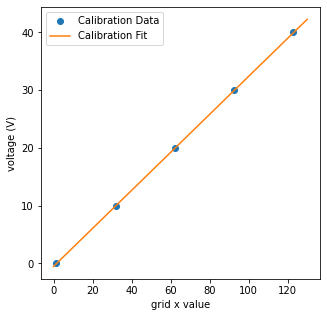

In [133]:
# Make and test calibration function
def m_calibration(x):
    return mc_params['slope'].value * x + mc_params['intercept'].value

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5, 5)

fit_x = np.linspace(0, 130, 100)
fit_y = m_calibration(fit_x)

ax.plot(mc_data['grid x'], mc_data['voltage (V)'], marker='o', linestyle='none', label="Calibration Data")
ax.plot(fit_x, fit_y, linestyle='-', label="Calibration Fit")

ax.set_xlabel("grid x value")
ax.set_ylabel("voltage (V)")

ax.legend();

### Apply the calibration

Change peak/trough positions into voltages.

In [134]:
# Show the Hg peak/trough ositions 

In [136]:
# Calibrate 
# Recommended: make a new Dataframe.
mpda_data = FHdata['Mercury PDA Min and Max']
mpda_data['voltage (V)'] = m_calibration(mpda_data['grid x'])
mpda_data

,grid x,grid y,voltage (V),PDA-700 current (nA),min or max,number
0,23.00,7.50,7.045329,NaN,max,1
1,27.50,7.00,8.526803,NaN,min,1
2,36.00,15.00,11.325144,NaN,max,2
3,42.00,8.25,13.300443,NaN,min,2
4,50.25,24.00,16.016480,NaN,max,3
5,56.50,9.25,18.074083,NaN,min,3
6,65.50,33.00,21.037032,NaN,max,4
7,71.50,11.50,23.012331,NaN,min,4
8,80.50,38.50,25.975280,NaN,max,5
9,87.00,14.75,28.115188,NaN,min,5


### Plot and check

In [137]:
t_numbers = mpda_data[mpda_data['min or max'] == 'min']['number']
t_voltages = mpda_data[mpda_data['min or max'] == 'min']['voltage (V)']

p_numbers = mpda_data[mpda_data['min or max'] == 'max']['number']
p_voltages = mpda_data[mpda_data['min or max'] == 'max']['voltage (V)']

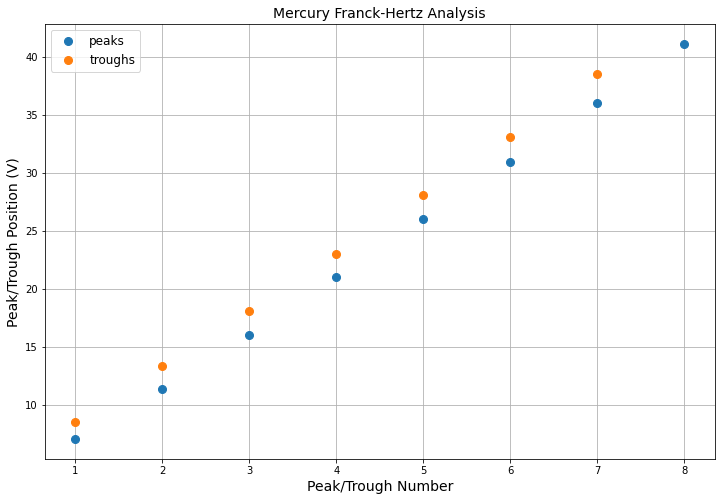

In [138]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(12, 8)
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

ax.plot(p_numbers, p_voltages, marker='o', linestyle='none', markersize=8, label='peaks')
ax.plot(t_numbers, t_voltages, marker='o', linestyle='none', markersize=8, label='troughs')

plt.legend(fontsize=12);

### Fit positions

As before, fit the peak and trough positions to a line ("traditional") and a quadratic (part of RSB method).  Save the parameters.

In [139]:
# Line fit, troughs
model = LinearModel()
pars = model.guess(t_voltages, x=t_numbers)
merc_t_lin_fit = model.fit(t_voltages, pars, x=t_numbers)
merc_t_lin_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,4.97940026,0.04328060,(0.87%),4.979400256870193,-inf,inf,True
intercept,3.30636958,0.19355672,(5.85%),3.306369575668723,-inf,inf,True


In [140]:
# Quadratic fit, troughs
model = QuadraticModel()
pars = model.guess(t_voltages, x=t_numbers)
merc_t_quad_fit = model.fit(t_voltages, pars, x=t_numbers)
merc_t_quad_fit.params

name,value,standard error,relative error,initial value,min,max,vary
a,0.05290980,0.00898011,(16.97%),0.05290980202105262,-inf,inf,True
b,4.55612184,0.07350539,(1.61%),4.5561218407017705,-inf,inf,True
c,3.94128720,0.12826169,(3.25%),3.9412871999213577,-inf,inf,True


In [141]:
# Line fit, peaks
model = LinearModel()
pars = model.guess(p_voltages, x=p_numbers)
merc_p_lin_fit = model.fit(p_voltages, pars, x=p_numbers)
merc_p_lin_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,4.90003555,0.04632135,(0.95%),4.900035553838615,-inf,inf,True
intercept,1.63089251,0.23391133,(14.34%),1.6308925116687005,-inf,inf,True


In [142]:
# Quadratic fit, peaks
model = QuadraticModel()
pars = model.guess(p_voltages, x=p_numbers)
merc_p_quad_fit = model.fit(p_voltages, pars, x=p_numbers)
merc_p_quad_fit.params

name,value,standard error,relative error,initial value,min,max,vary
a,0.05144009,0.01069970,(20.80%),0.05144008529824574,-inf,inf,True
b,4.43707479,0.09864636,(2.22%),4.4370747861544,-inf,inf,True
c,2.40249379,0.19348418,(8.05%),2.4024937911424127,-inf,inf,True


### Make a plot

Show, on a single plot, the peak positions, the trough positions (both as dots) with fit lines and fit curves for each.  One member of the grou should include this plot in your Group Document.

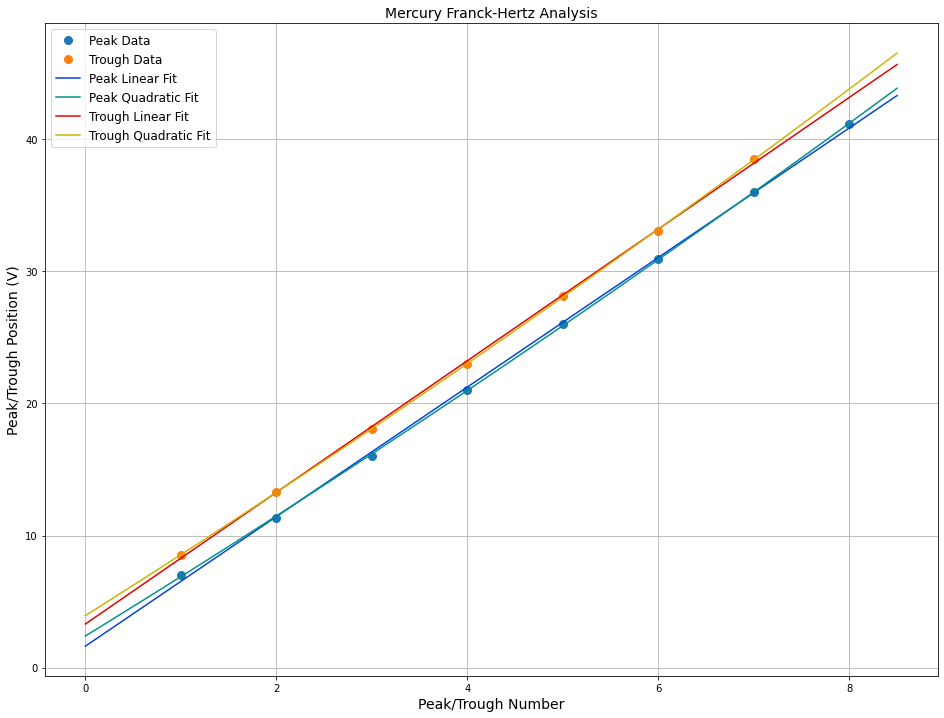

In [144]:
# For a smooth curve make an x range with a bunch of points.  100 should be fine.
xfit = np.linspace(0, 8.5, 100)

trough_line = merc_t_lin_fit.eval(merc_t_lin_fit.params, x=xfit)
peak_line = merc_p_lin_fit.eval(merc_p_lin_fit.params, x=xfit)

trough_quad = merc_t_quad_fit.eval(merc_t_quad_fit.params, x=xfit)
peak_quad = merc_p_quad_fit.eval(merc_p_quad_fit.params, x=xfit)


# Then redo the above plot with fit lines and curves

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 12)
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

ax.plot(p_numbers, p_voltages, marker='o', linestyle='none', markersize=8, label='Peak Data')
ax.plot(t_numbers, t_voltages, marker='o', linestyle='none', markersize=8, label='Trough Data')

ax.plot(xfit, peak_line, label="Peak Linear Fit", color="xkcd:blue")
ax.plot(xfit, peak_quad, label="Peak Quadratic Fit", color='xkcd:teal')
ax.plot(xfit, trough_line, label="Trough Linear Fit", color="xkcd:red")
ax.plot(xfit, trough_quad, label="Trough Quadratic Fit", color="xkcd:mustard")

plt.legend(fontsize=12);

### Calculate peak/trough differences

As before, carry out the RSB approach as they describe it, by taking the <i>differences</i> in the positions of subsequent features to create an array $\Delta E(n) = E_n - E_{n-1}$; note $n$ is the upper number.

Then, plot and fit these to a line.  The energy of the lowest excited state should be given by $\Delta E(0.5)$.  Save the fit parameters as before.

In [145]:
# Recommended: use Python "List comprehensions"  See the Python text on how to make these
mpda_data['dV'] = mpda_data['voltage (V)'] - mpda_data['voltage (V)'].shift(1)

# Have a look at them, e.g., 
# print('List of Mercury peak differences (V):', Hg_peak_diffs)
print('List of mercury peak differences (V): ', mpda_data[mpda_data['min or max'] == 'max']['dV'].tolist())
# print('List of Mercury trough differences (V):', Hg_trough_diffs)
print('List of mercury trough differences (V): ', mpda_data[mpda_data['min or max'] == 'min']['dV'].tolist())

List of mercury peak differences (V):  [nan, 2.79834064022457, 2.7160365037473753, 2.962948913178959, 2.962948913178959, 2.7983406402245734, 2.9629489131789555, 2.6337323672701842]
List of mercury trough differences (V):  [1.4814744565894795, 1.9752992754526417, 2.0576034119298328, 1.9752992754526382, 2.139907548407024, 2.139907548407024, 2.469124094315802]


In [146]:
# Line fit to trough diffs

t_diffs = mpda_data[mpda_data['min or max'] == 'min']['dV']

model = LinearModel()
pars = model.guess(t_diffs, x=t_numbers)
t_diff_fit = model.fit(t_diffs, pars, x=t_numbers)
t_diff_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,0.12051677,0.02900969,(24.07%),0.12051677127017595,-inf,inf,True
intercept,1.55202086,0.12973528,(8.36%),1.5520208592842166,-inf,inf,True


In [147]:
# Line fit to peak diffs

p_diffs = mpda_data[mpda_data['min or max'] == 'max']['dV'][1:]

model = LinearModel()
pars = model.guess(p_diffs, x=p_numbers[1:])
p_diff_fit = model.fit(p_diffs, pars, x=p_numbers[1:])
p_diff_fit.params

name,value,standard error,relative error,initial value,min,max,vary
slope,-0.00587887,0.02744869,(466.90%),-0.005878866891227937,-inf,inf,True
intercept,2.86300818,0.14781575,(5.16%),2.86300817602808,-inf,inf,True


### Make a differences plot

Show, on a single plot, the peak position differences, the trough position differences (both as dots) with fit lines for each.  One member of the grou should include this plot in your Group Document.

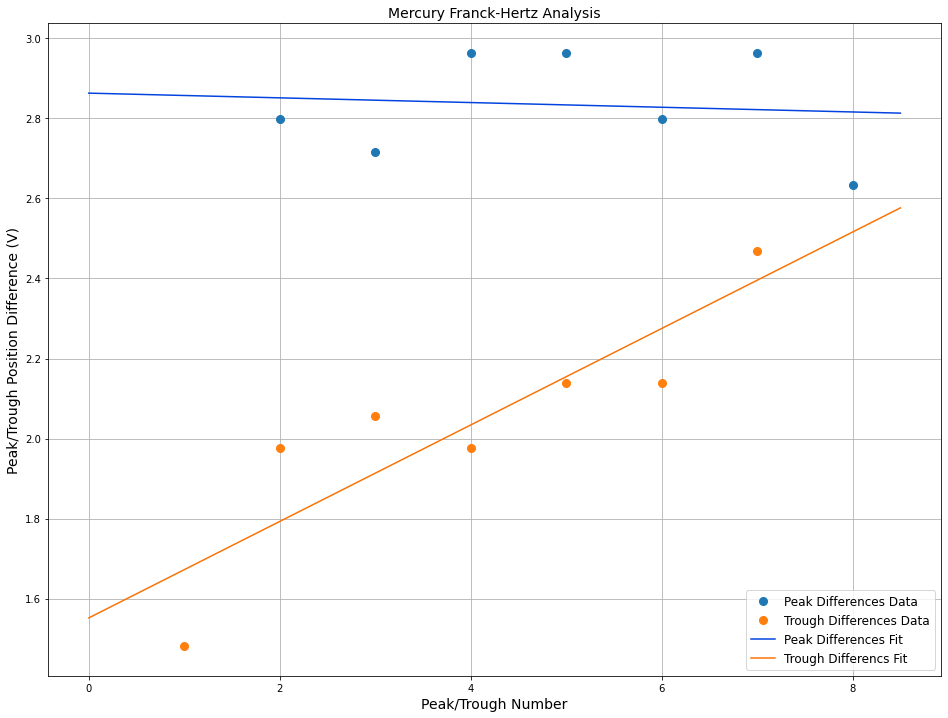

In [149]:
# Plot

xfit = np.linspace(0, 8.5, 100)

t_diff_line = t_diff_fit.eval(t_diff_fit.params, x=xfit)
p_diff_line = p_diff_fit.eval(p_diff_fit.params, x=xfit)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches(16, 12)
plt.grid()
plt.title('Mercury Franck-Hertz Analysis',fontsize=14)
plt.ylabel('Peak/Trough Position Difference (V)',fontsize=14)
plt.xlabel('Peak/Trough Number',fontsize=14)

ax.plot(p_numbers[1:], p_diffs, marker='o', linestyle='none', markersize=8, label='Peak Differences Data')
ax.plot(t_numbers, t_diffs, marker='o', linestyle='none', markersize=8, label='Trough Differences Data')

ax.plot(xfit, p_diff_line, color="xkcd:blue", label="Peak Differences Fit")
ax.plot(xfit, t_diff_line, color="xkcd:orange", label="Trough Differencs Fit")

plt.legend(fontsize=12);

## Final results for Hg

Calculate the losest excited state energy, as was done for neon. 

In [153]:
print('CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD')
print('Troughs analysis:')
# Your code here
a = merc_t_quad_fit.params['a'].value
b = merc_t_quad_fit.params['b'].value
p = b - a
m = 2 * a
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\nPeaks analysis:')
# Your code here
a = merc_p_quad_fit.params['a'].value
b = merc_p_quad_fit.params['b'].value
p = b - a
m = 2 * a
print('p ?= b-a: {:.2f} ?= {:.2f} = {:.2f}-{:.2f}'.format(p,b-a,b,a))
print('m ?= 2a: {:.2f} ?= {:.2f} = 2*{:.2f}'.format(m,2*a,a))

print('\n\nCALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS')

# Your code here
Ea_trad_pk = p_diffs.mean()
Ea_trad_tr = t_diffs.mean()
print('"Traditional" average peak spacing: {:.2f} V'.format(Ea_trad_pk))
print('"Traditional" average trough spacing: {:.2f} V'.format(Ea_trad_tr))

# From quadratic fit, see E_a as parameter b
# From RSB n=1/2 method, E_a = p + m/2

a = merc_t_quad_fit.params['a'].value
b = merc_t_quad_fit.params['b'].value
p = b - a
m = 2 * a

print('\nRSB method using line fit to peak/trough position differences')

# Your code here
print("E_a = p + m/2 = {0:.2f} V".format(p+m/2))

print('\nRSB method using quadratic fit to peak/trough positions')

# Your code here
print("E_a = b = {0:.2f} V".format(b))

CONISISTENCY CHECK OF FIT COEFFICIENTS IN RSB METHOD
Troughs analysis:
p ?= b-a: 4.50 ?= 4.50 = 4.56-0.05
m ?= 2a: 0.11 ?= 0.11 = 2*0.05

Peaks analysis:
p ?= b-a: 4.39 ?= 4.39 = 4.44-0.05
m ?= 2a: 0.10 ?= 0.10 = 2*0.05


CALCULATION OF FIRST EXCITED STATE OF NEON FROM DIFFERENT METHODS
"Traditional" average peak spacing: 2.83 V
"Traditional" average trough spacing: 2.03 V

RSB method using line fit to peak/trough position differences
E_a = p + m/2 = 4.56 V

RSB method using quadratic fit to peak/trough positions
E_a = b = 4.56 V


## Calculation of mean free path $\lambda$

The parameter $\lambda/L$ contains the mean free path between electron collisions.  Calculate this value for Hg given the measureable distance between the cathode and grid $L$.  See photos of the apparatus to obtain this value.

NOTE: You cannot use the word `lambda` as a variable in Python.  It is a keyword (something that is defined by the language).

$$ \Delta E(n) = E_{n} - E_{n-1} = E_a\left(1-\frac{\lambda}{L}\right) + E_a2\frac{\lambda}{L}n = p + mn$$

so:

$$ E_a2\frac{\lambda}{L} = m $$

$$ \lambda = \frac{m L}{E_a 2}$$

In [ ]:
## Your code here.  Use uncertainty objects and uncertainties in fit parameters to get uncertainty in mean free path.


print('CALCULATION OF MEAN FREE PATH, RSB METHOD\n')
#print('Mean free path from troughs fit = {:.2uP} cm'.format(())
#print('Mean free path from peaks fit = {:.2uP} cm'.format(())

# Print comparison to RSB results